# Unsupervised ML - K-Means Clustering 
# (Non-Hierarchical Clustering) (Univ.)

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# import dataset
univ=pd.read_csv('Database/Universities.csv')
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [3]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
univ_norm=StandardScaler().fit_transform(univ.iloc[:,1:])
univ_norm

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [4]:
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change. 

In [5]:
# within-cluster sum-of-squares criterion 
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=1)  
    kmeans.fit(univ_norm)
    wcss.append(kmeans.inertia_)

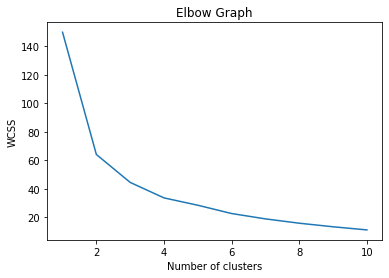

In [6]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Build Cluster algorithm using K=4

In [7]:
# Cluster algorithm using K=4
clusters4=KMeans(4,random_state=42).fit(univ_norm)
clusters4

KMeans(n_clusters=4, random_state=42)

In [8]:
clusters4.labels_

array([0, 3, 2, 0, 2, 0, 0, 2, 0, 3, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0])

In [9]:
# Assign clusters to the data set
univ4=univ.copy()
univ4['clusters4id']=clusters4.labels_
univ4

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusters4id
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,3


In [10]:
# Compute the centroids for K=4 clusters with 6 variables
clusters4.cluster_centers_

array([[ 0.80273428,  0.68086062, -0.90136381, -0.43159988,  0.44062556,
         0.79526289],
       [-1.93029211, -1.98148647,  1.59348244,  1.63857398, -1.23359906,
        -1.68680366],
       [-0.12658888,  0.06407139,  0.2224667 ,  0.04516743, -0.38064332,
         0.02028221],
       [ 0.88122441,  0.5787432 , -0.24316128, -1.56078563,  2.38759968,
        -0.3064867 ]])

In [11]:
# Group data by Clusters (K=4)
univ4.groupby('clusters4id').agg(['mean']).reset_index()

,clusters4id,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1351.666667,89.444444,21.777778,11.00,33615.555556,93.777778
1,1,1061.500000,38.750000,70.000000,19.25,9953.000000,71.750000
2,2,1253.000000,77.700000,43.500000,12.90,22008.200000,86.900000
3,3,1360.000000,87.500000,34.500000,6.50,61133.000000,84.000000


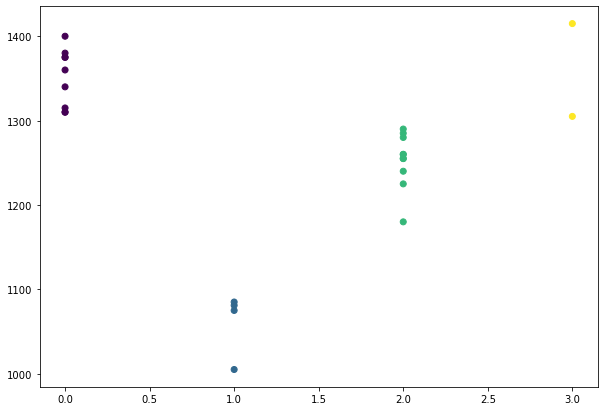

In [12]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(univ4['clusters4id'],univ4['SAT'], c=clusters4.labels_) 

### Build Cluster algorithm using K=3

In [13]:
# Cluster algorithm using K=3
clusters3=KMeans(3,random_state=42).fit(univ_norm)
clusters3

KMeans(n_clusters=3, random_state=42)

In [14]:
clusters3.labels_

array([0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0])

In [15]:
# Assign clusters to the data set
univ3=univ.copy()
univ3['clusters3id']=clusters3.labels_
univ3

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusters3id
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [16]:
# Compute the centroids for K=3 clusters with 6 variables
clusters3.cluster_centers_

array([[ 0.81700521,  0.66229382, -0.78169062, -0.63690638,  0.79462086,
         0.59494478],
       [-1.93029211, -1.98148647,  1.59348244,  1.63857398, -1.23359906,
        -1.68680366],
       [-0.12658888,  0.06407139,  0.2224667 ,  0.04516743, -0.38064332,
         0.02028221]])

In [17]:
# Group data by Clusters (K=3)
univ3.groupby('clusters3id').agg(['mean']).reset_index()

,clusters3id,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1353.181818,89.090909,24.090909,10.181818,38618.727273,92.00
1,1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.75
2,2,1253.000000,77.700000,43.500000,12.900000,22008.200000,86.90


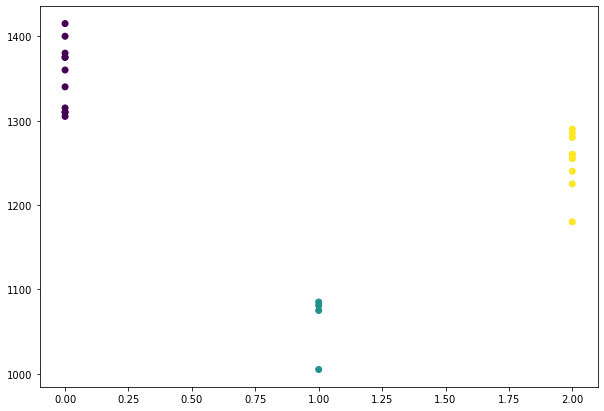

In [18]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(univ3['clusters3id'],univ3['SAT'], c=clusters3.labels_) 